Random Forest Classification Report:
               precision    recall  f1-score   support

        toxic       0.92      0.58      0.71      3056
 severe_toxic       0.51      0.08      0.14       321
      obscene       0.90      0.64      0.75      1715
       threat       0.50      0.05      0.10        74
       insult       0.82      0.46      0.59      1614
identity_hate       0.79      0.06      0.12       294

    micro avg       0.89      0.52      0.65      7074
    macro avg       0.74      0.31      0.40      7074
 weighted avg       0.87      0.52      0.64      7074
  samples avg       0.05      0.04      0.05      7074

Random Forest Accuracy: 0.92


c:\Users\mohammed luqmaan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohammed luqmaan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/5


c:\Users\mohammed luqmaan\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1596/1596 ━━━━━━━━━━━━━━━━━━━━ 270s 168ms/step - accuracy: 0.9849 - loss: 0.1274 - val_accuracy: 0.9943 - val_loss: 0.0533
Epoch 2/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 217s 136ms/step - accuracy: 0.9939 - loss: 0.0499 - val_accuracy: 0.9943 - val_loss: 0.0504
Epoch 3/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 243s 152ms/step - accuracy: 0.9934 - loss: 0.0443 - val_accuracy: 0.9937 - val_loss: 0.0537
Epoch 4/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 242s 152ms/step - accuracy: 0.9925 - loss: 0.0410 - val_accuracy: 0.9926 - val_loss: 0.0524
Epoch 5/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 246s 154ms/step - accuracy: 0.9897 - loss: 0.0371 - val_accuracy: 0.9940 - val_loss: 0.0569
998/998 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

        toxic       0.82      0.73      0.77      3056
 severe_toxic       0.49      0.41      0.45       321
      obscene       0.84      0.76      0.80      1715
       threat       0.00      0.00      0.00        7

c:\Users\mohammed luqmaan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohammed luqmaan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohammed luqmaan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


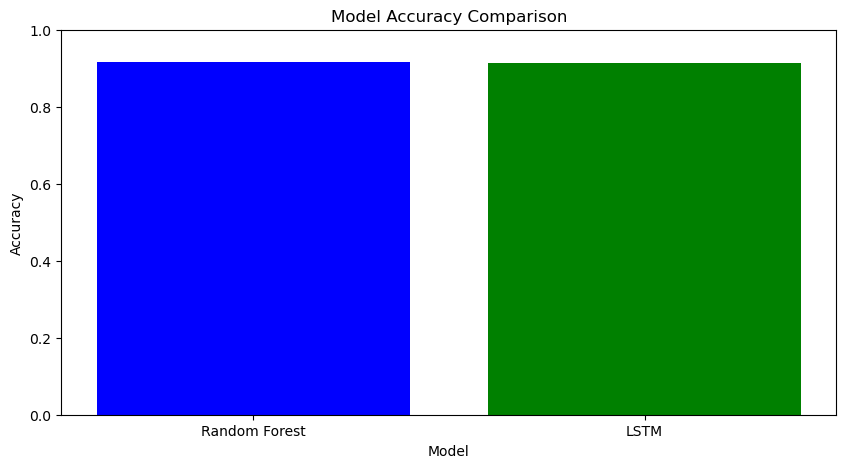

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv("C://Users//mohammed luqmaan//OneDrive//Desktop//Datasets//train.csv").fillna('')

# Combine all text columns into a single column
df['text'] = df['comment_text']

# Encode the labels
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[label_cols] = df[label_cols].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df[label_cols], test_size=0.2, random_state=42)

# TF-IDF Vectorization for Random Forest
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_cols))
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Tokenization and padding for LSTM
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(6, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Predict and evaluate LSTM
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=label_cols))
print(f"LSTM Accuracy: {accuracy_lstm:.2f}")

# Visualization
models = ['Random Forest', 'LSTM']
accuracies = [accuracy_rf, accuracy_lstm]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


In [3]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/385.0 MB 30.7 MB/s eta 0:00:13
   ---------------------------------------- 2.4/385.0 MB 25.8 MB/s eta 0:00:15
   ---------------------------------------- 3.9/385.0 MB 31.4 MB/s eta 0:00:13
    --------------------------------------- 5.5/385.0 MB 31.9 MB/s eta 0:00:12
    --------------------------------------- 7.1/385.0 MB 32.5 MB/s eta 0:00:12
    --------------------------------------- 8.7/385.0 MB 32.7 MB/s eta 0:00:12
   - -------------------------------------- 11.1/385.0 MB 36.4 MB/s eta 0:00:11
   - -------------------------------------- 12.0/385.0 MB 34.4 MB/s eta 0:00:11
   - -------------------------------------- 13.5/385.0 MB 34.4 MB/s eta 0:00:11
   - -------------------------------------- 15.8/385.0 MB 38.6 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv("C://Users//mohammed luqmaan//OneDrive//Desktop//Datasets//train.csv").fillna('')

# Combine all text columns into a single column
df['text'] = df['comment_text']

# Encode the labels
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[label_cols] = df[label_cols].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df[label_cols], test_size=0.2, random_state=42)

# TF-IDF Vectorization for Random Forest
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test.values.argmax(axis=1), y_pred_rf.argmax(axis=1))
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_cols, yticklabels=label_cols)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Random Forest
plt.figure(figsize=(12, 8))
for i, label in enumerate(label_cols):
    fpr, tpr, _ = roc_curve(y_test[label], rf.predict_proba(X_test_tfidf)[:, i])
    plt.plot(fpr, tpr, label=f'{label} (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Tokenization and padding for LSTM
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(6, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model with Learning Curves
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict and evaluate LSTM
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)

# Confusion Matrix for LSTM
conf_matrix_lstm = confusion_matrix(y_test.values.argmax(axis=1), y_pred_lstm.argmax(axis=1))
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=label_cols, yticklabels=label_cols)
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for LSTM
plt.figure(figsize=(12, 8))
for i, label in enumerate(label_cols):
    fpr, tpr, _ = roc_curve(y_test[label], model.predict(X_test_pad)[:, i])
    plt.plot(fpr, tpr, label=f'{label} (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Visualization
models = ['Random Forest', 'LSTM']
accuracies = [accuracy_rf, accuracy_lstm]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
